# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [180]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,5,3.5
1,4,3.0
2,3,2.5
3,2,2.0
4,1,1.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


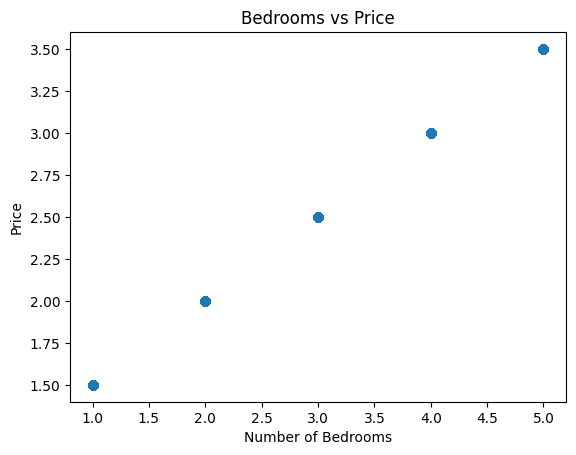

In [186]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [182]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 1)
Shape of X_test: (200, 1)
Shape of y_train: (800,)
Shape of y_test: (200,)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick a loss function that suits this problem.


In [183]:
# TODO Create the model
model = keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(1)  # No activation function - linear output
])


# TODO Compile the model
# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['accuracy']
# )

model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error - standard loss for regression
    metrics=['mae']  # Mean Absolute Error - easy to interpret
)

# TODO print a Summary of the model
# Hint: for the parameters to show, you need to define an Input layer; alternatively, you can inspect the summary after fitting the model
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


Epoch 1/400


20/20 - 1s - 28ms/step - loss: 5.8957 - mae: 2.3429 - val_loss: 5.7983 - val_mae: 2.3208 - learning_rate: 1.0000e-03
Epoch 2/400
20/20 - 0s - 6ms/step - loss: 5.5028 - mae: 2.2653 - val_loss: 5.4057 - val_mae: 2.2425 - learning_rate: 1.0000e-03
Epoch 3/400
20/20 - 0s - 4ms/step - loss: 5.1295 - mae: 2.1884 - val_loss: 5.0307 - val_mae: 2.1650 - learning_rate: 1.0000e-03
Epoch 4/400
20/20 - 0s - 5ms/step - loss: 4.7718 - mae: 2.1124 - val_loss: 4.6784 - val_mae: 2.0895 - learning_rate: 1.0000e-03
Epoch 5/400
20/20 - 0s - 5ms/step - loss: 4.4356 - mae: 2.0382 - val_loss: 4.3428 - val_mae: 2.0148 - learning_rate: 1.0000e-03
Epoch 6/400
20/20 - 0s - 5ms/step - loss: 4.1176 - mae: 1.9653 - val_loss: 4.0250 - val_mae: 1.9414 - learning_rate: 1.0000e-03
Epoch 7/400
20/20 - 0s - 5ms/step - loss: 3.8143 - mae: 1.8933 - val_loss: 3.7299 - val_mae: 1.8706 - learning_rate: 1.0000e-03
Epoch 8/400
20/20 - 0s - 4ms/step - loss: 3.5311 - mae: 1.8235 - val_loss: 3.4502 - val_mae: 1.8008 - learning_rate

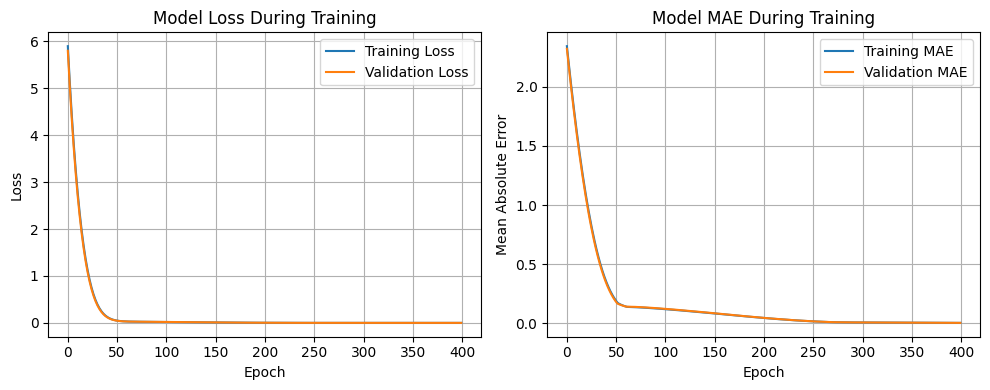

In [ ]:
# TODO Train the model
# model.fit(
#     X_train,
#     y_train,
#     batch_size = 64,
#     epochs = 150,
#     verbose = 2
# )

history = model.fit(
    X_train,
    y_train,
    batch_size=32,          # Smaller batch size for better gradient estimates
    epochs=400,             # More epochs to ensure convergence
    verbose=2,
    validation_split=0.2,   # Monitor validation loss to avoid overfitting
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=0.0001
        )
    ]
)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


7/7 - 0s - 16ms/step - loss: 1.4156e-05 - mae: 0.0033

Sample Predictions vs Actual Values:
Bedrooms: 3, Predicted Price: $2.5000k, Actual Price: $2.5000k
Bedrooms: 2, Predicted Price: $2.0000k, Actual Price: $2.0000k
Bedrooms: 5, Predicted Price: $3.5000k, Actual Price: $3.5000k
Bedrooms: 2, Predicted Price: $2.0000k, Actual Price: $2.0000k
Bedrooms: 3, Predicted Price: $2.5000k, Actual Price: $2.5000k
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


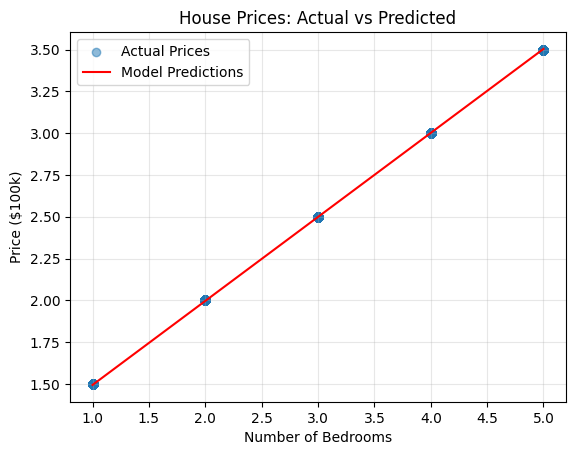

In [185]:
# TODO Evaluate the model using the model.evaluate() function
model.evaluate(
    X_test,
    y_test,
    batch_size = 32,
    verbose = 2
)

# TODO Make predictions
y_pred = model.predict(X_test, verbose=0)  # Get model predictions

# Print a few example predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(5):  # Show first 5 examples
    print(
        f"Bedrooms: {X_test.iloc[i,0]:.0f}, "
        f"Predicted Price: ${y_pred[i,0]:.2f}00k, "
        f"Actual Price: ${y_test.iloc[i]:.2f}00k"
        )


# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)

# Create a scatter plot of actual data
plt.scatter(df['bedrooms'], df['price'], label='Actual Prices', alpha=0.5)

# Create prediction line
# We'll create evenly spaced points for a smooth line
x_line = np.linspace(1, 5, 100).reshape(-1, 1)  # 100 points between 1-5 bedrooms
y_line = model.predict(x_line)

# Plot prediction line
plt.plot(x_line, y_line, 'r-', label='Model Predictions')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($100k)')
plt.title('House Prices: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.